Como o dataset possui poucas linhas de dados, foi comparado a tecnica da separação por train/test com a Leave-one-out Cross Validation (LOOCV)

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

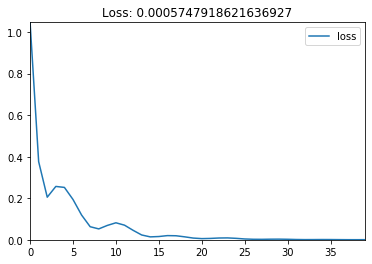

MSE of training: 0.0005836168896745552
MSE of testing: 0.10287126898765564
    Prediction      Real     % error
8     7.486943  8.491036   11.825326
0     6.923376  8.075241   14.264160
7     5.487611  5.156991    6.411107
9     4.177361  4.785659   12.710838
2     5.281531  4.616062   14.416380
1     3.005799  3.669486   18.086656
6     3.805915  3.491649    9.000516
3     2.740126  3.003443    8.767180
10    1.252648  1.377930    9.092041
5     2.215442  0.900556  146.008149
4    -0.523648  0.667981  178.392601


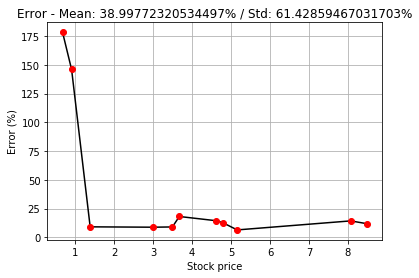

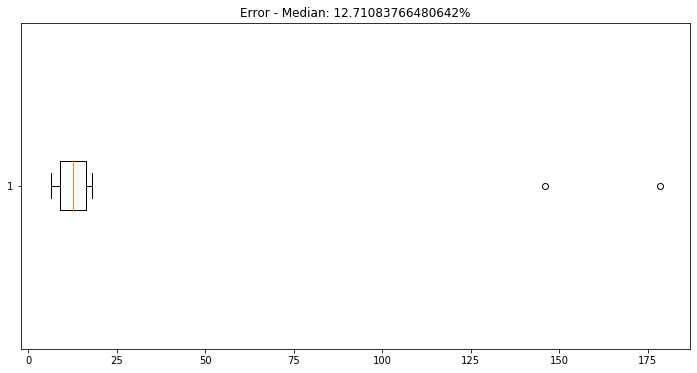

count     11.000000
mean      38.997723
std       61.428595
min        6.411107
25%        9.046279
50%       12.710838
75%       16.251518
max      178.392601
Name: % error, dtype: float64


In [2]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)